In [2]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

from maxent_gan.datasets.utils import get_dataset

In [3]:
dataset = get_dataset('cifar10')

Files already downloaded and verified


In [3]:
info = np.load(Path('../data/cifar10/kmeans.npz'))
centroids = (info['centroids'].reshape(-1, 3, 32, 32) + 1) / 2
closest_pts = (info['closest_pts'].reshape(-1, 3, 32, 32) + 1) / 2
sigmas = info['sigmas']

In [4]:
info['centroids'][0]

array([-0.23830399, -0.24608101, -0.24162816, ..., -0.14497572,
       -0.14523813, -0.14163513], dtype=float32)

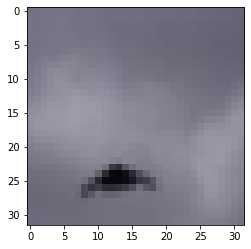

In [5]:
plt.imshow(closest_pts[0].transpose(1, 2, 0))

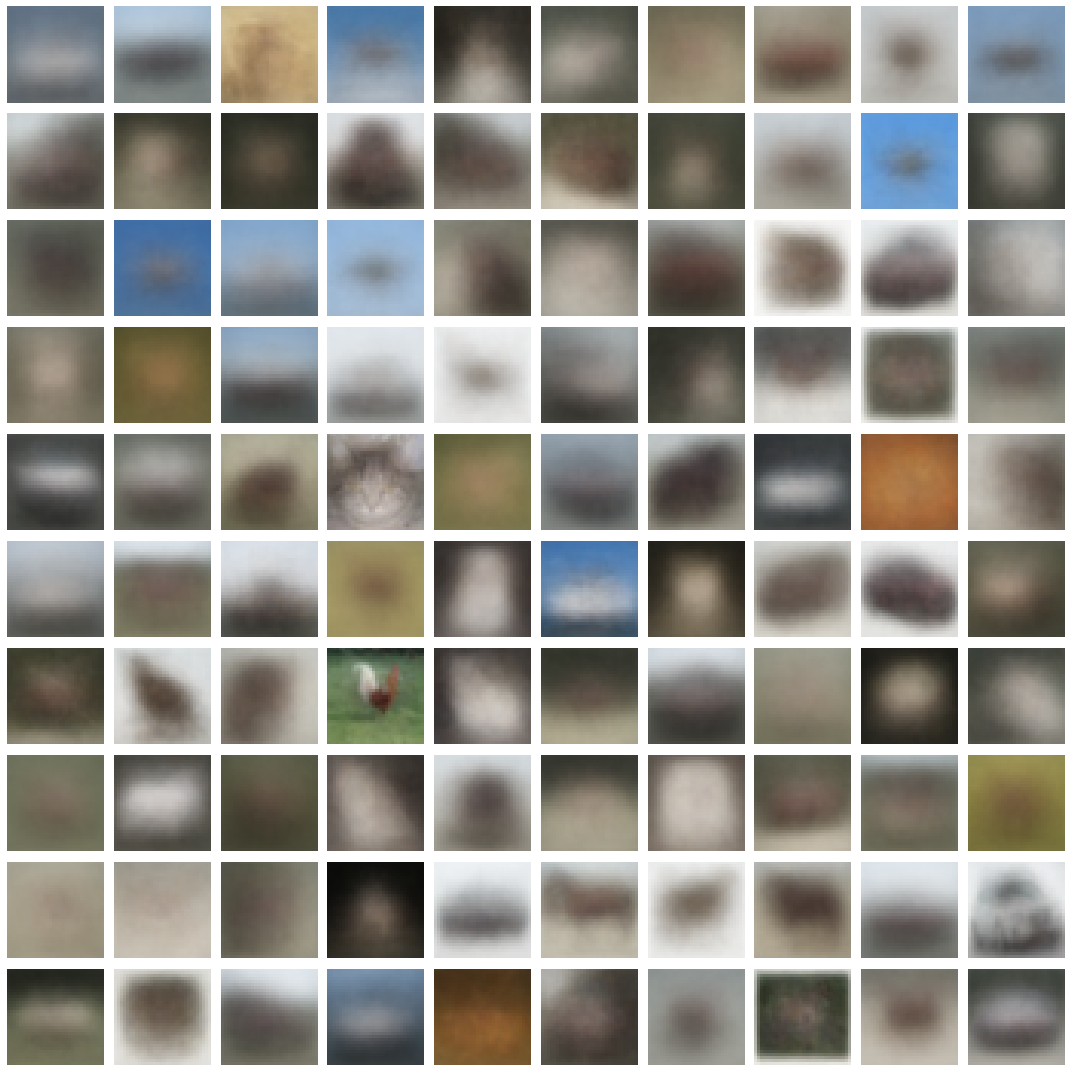

In [6]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(centroids[i].transpose(1, 2, 0))
    ax.axis('off')


fig.tight_layout()
plt.savefig('../dump/centroids.png')


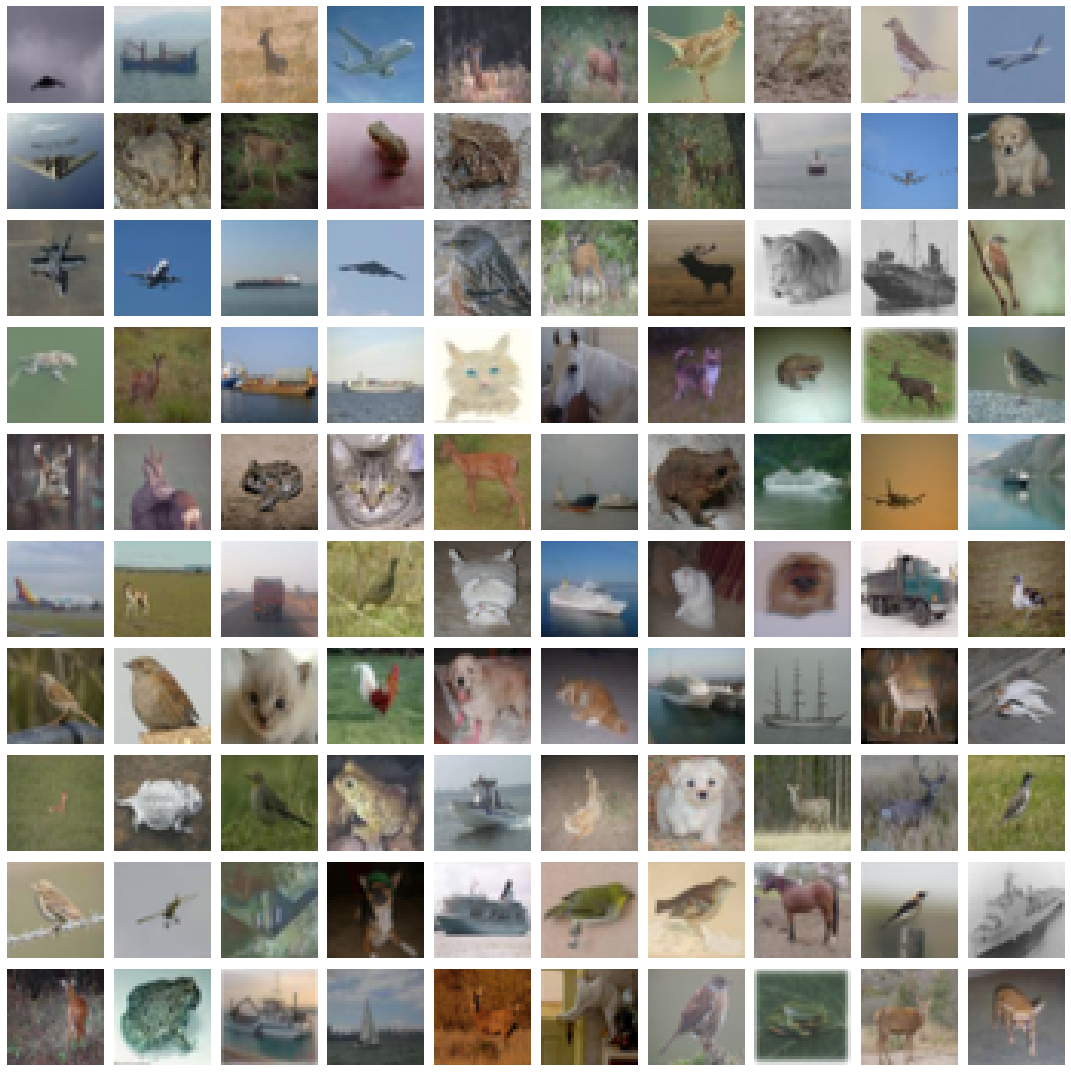

In [7]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(closest_pts[i].transpose(1, 2, 0))
    ax.axis('off')


fig.tight_layout()
plt.savefig('../dump/closest_pts.png')

In [8]:
info = np.load(Path('../data/cifar10/pca.npz'))
components = (info['components'].reshape(-1, 3, 32, 32) + 1) / 2


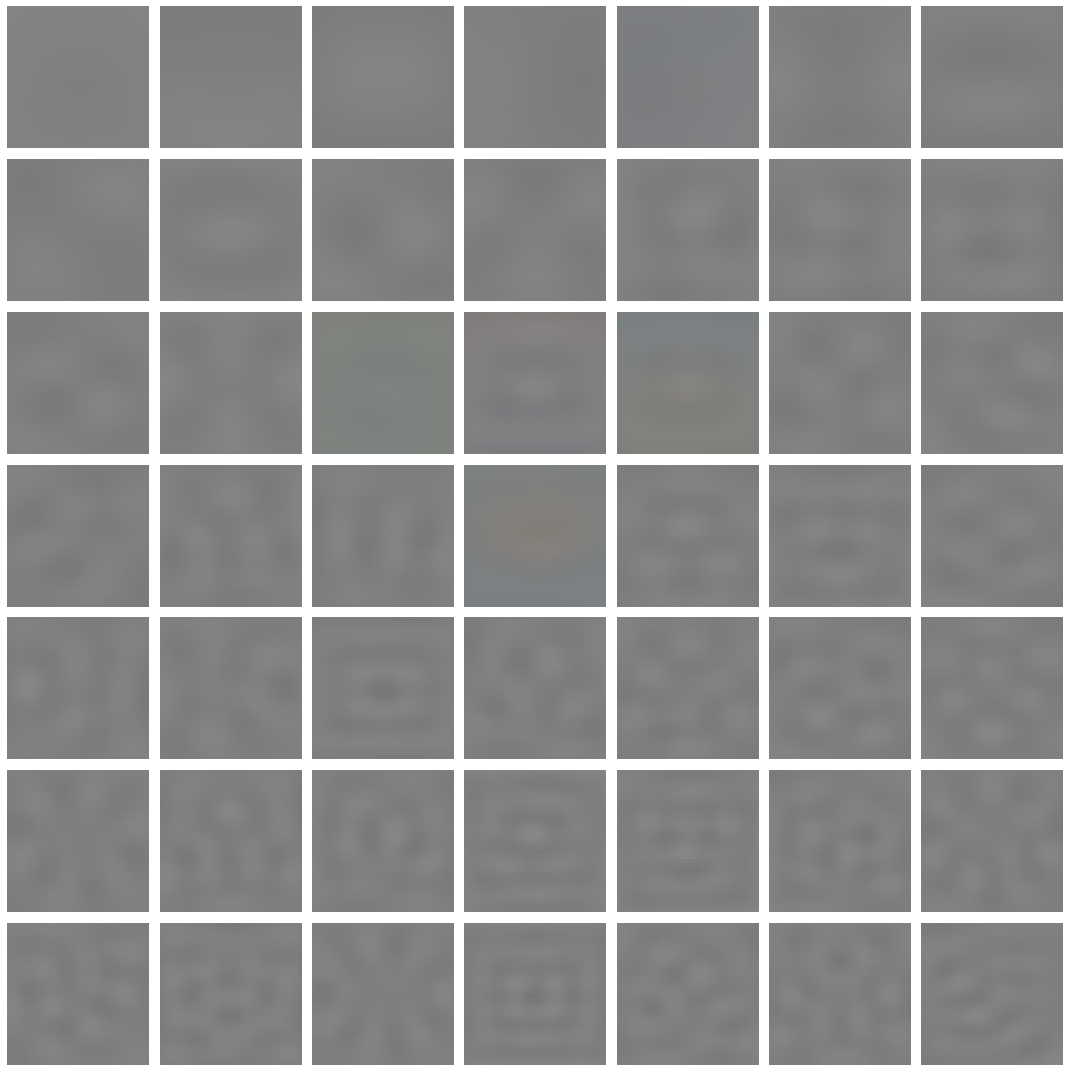

In [10]:
fig, axs = plt.subplots(7, 7, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(components[i].transpose(1, 2, 0))
    ax.axis('off')


fig.tight_layout()
# plt.savefig('../dump/centroids.png')


In [15]:
id_pt = 23

n_clusters = len(centroids)

id = np.argmin(np.linalg.norm(closest_pts[id_pt].reshape(-1)[None, :] - centroids.reshape(n_clusters, -1)[None, ...], axis=-1))

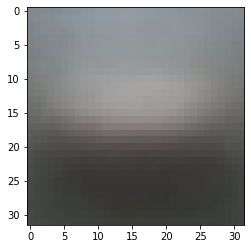

In [16]:
plt.imshow(centroids[id].transpose(1, 2, 0))

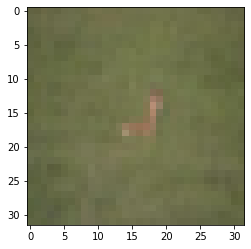

In [8]:
plt.imshow(closest_pts[1].transpose(1, 2, 0))

In [129]:
id, id_pt

(34, 19)

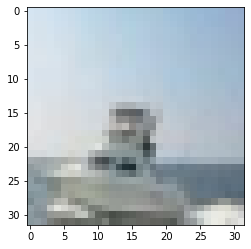

In [64]:
plt.imshow((dataset[100].permute(1,2,0)+1)/2)

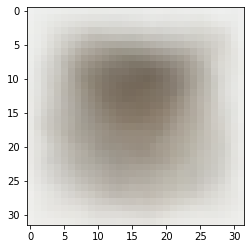

In [65]:
plt.imshow(centroids[7].transpose(1, 2, 0))

In [66]:
import torch

torch.sigmoid((dataset[675] - (centroids[7]-0.5)/0.5).reshape(-1).norm() - sigmas[7])

tensor(1.)

In [12]:
np_dataset = np.concatenate(
    [
        dataset[i].unsqueeze(0).reshape(1, -1).numpy()
        for i in range(len(dataset))
    ],
    0,
)  # .reshape(len(dataset), -1)


In [13]:
from sklearn.decomposition import PCA, KernelPCA

n_components = 100

In [28]:
pca = KernelPCA(n_components=n_components, kernel='linear', gamma=1./np_dataset.shape[1]) #, whiten=False)
pca.fit(np_dataset[:5000])

KernelPCA(gamma=0.0003255208333333333, n_components=100)

In [29]:
pca.gamma

0.0003255208333333333

In [32]:
pca.X_fit_

array([[-0.5372549 , -0.6627451 , -0.60784316, ...,  0.09803927,
        -0.34117645, -0.4352941 ],
       [ 0.20784318, -0.01176471, -0.17647058, ...,  0.09019613,
         0.11372554,  0.12941182],
       [ 1.        ,  0.9843137 ,  0.9843137 , ..., -0.3490196 ,
        -0.3490196 , -0.34117645],
       ...,
       [ 0.30980396,  0.6156863 ,  0.58431375, ..., -0.36470586,
        -0.31764704, -0.34117645],
       [ 0.20784318,  0.22352946,  0.1686275 , ..., -0.11372548,
        -0.15294117, -0.10588235],
       [-0.64705884, -0.62352943, -0.4823529 , ..., -0.15294117,
        -0.27058822, -0.21568626]], dtype=float32)

In [33]:
np_dataset

array([[-0.5372549 , -0.6627451 , -0.60784316, ...,  0.09803927,
        -0.34117645, -0.4352941 ],
       [ 0.20784318, -0.01176471, -0.17647058, ...,  0.09019613,
         0.11372554,  0.12941182],
       [ 1.        ,  0.9843137 ,  0.9843137 , ..., -0.3490196 ,
        -0.3490196 , -0.34117645],
       ...,
       [-0.7254902 , -0.6862745 , -0.67058825, ..., -0.3960784 ,
        -0.4823529 , -0.60784316],
       [ 0.48235297,  0.45882356,  0.45098042, ...,  0.32549024,
         0.3411765 ,  0.3411765 ],
       [ 0.79607844,  0.8509804 ,  0.8352941 , ...,  0.35686278,
         0.27058828,  0.26274514]], dtype=float32)

In [20]:
non_zeros = np.flatnonzero(pca.eigenvalues_)
scaled_alphas = np.zeros_like(pca.eigenvectors_)
scaled_alphas[:, non_zeros] = pca.eigenvectors_[:, non_zeros] / np.sqrt(
    pca.eigenvalues_[non_zeros]
)

In [34]:
scaled_alphas.shape

(5000, 100)

In [8]:
import pickle 

pickle.dump(pca, Path('../data/cifar10/pca_rbf.pkl').open("wb"))

In [9]:
pca = pickle.load(Path('../data/cifar10/pca_rbf.pkl').open("rb"))

In [11]:
pca.transform(np_dataset)

array([[-1.3148388e+01,  4.7145815e+00, -4.3867497e+00, ...,
        -5.3339100e-01,  1.5563512e-01, -5.0988173e-01],
       [ 1.8585134e+00, -2.7040625e+00, -1.2279432e+01, ...,
         1.6217980e+00,  2.1170092e+00, -1.1756159e+00],
       [ 1.5831816e+01, -2.1206312e+01,  7.8809357e+00, ...,
        -3.5893071e-01, -3.7820935e-02, -8.1845737e-01],
       ...,
       [ 2.0707335e+00, -2.1414509e+01,  3.0591352e+00, ...,
        -1.6776850e+00,  9.3491888e-01,  6.9371450e-01],
       [ 2.3281160e+01, -6.4547100e+00, -9.8671064e+00, ...,
        -5.6987679e-01,  6.6250116e-01,  2.0995378e-02],
       [ 7.9789581e+00, -8.3043611e-01,  9.0819931e+00, ...,
        -1.1171517e+00, -1.3532953e+00,  2.6366651e-01]], dtype=float32)

In [7]:
pca.components_

AttributeError: 'KernelPCA' object has no attribute 'components_'

In [7]:
pca = PCA(n_components=n_components) #, whiten=False)
pca.fit(np_dataset)

PCA(n_components=100)

In [8]:
len(np_dataset)

50000